До SMOTE:
SVM -> Accuracy: 0.89, Recall: 0.85, Precision: 0.86, F1-Score: 0.85
KNN -> Accuracy: 0.87, Recall: 0.84, Precision: 0.82, F1-Score: 0.83
RF -> Accuracy: 0.87, Recall: 0.82, Precision: 0.81, F1-Score: 0.80
После SMOTE:
SVM -> Accuracy: 0.88, Recall: 0.82, Precision: 0.85, F1-Score: 0.82
KNN -> Accuracy: 0.89, Recall: 0.88, Precision: 0.88, F1-Score: 0.86
RF -> Accuracy: 0.90, Recall: 0.86, Precision: 0.84, F1-Score: 0.84
После Borderline SMOTE:
SVM -> Accuracy: 0.88, Recall: 0.82, Precision: 0.85, F1-Score: 0.82
KNN -> Accuracy: 0.90, Recall: 0.88, Precision: 0.89, F1-Score: 0.87
RF -> Accuracy: 0.88, Recall: 0.84, Precision: 0.87, F1-Score: 0.84
После Borderline SMOTE 2:
SVM -> Accuracy: 0.88, Recall: 0.82, Precision: 0.85, F1-Score: 0.82
KNN -> Accuracy: 0.88, Recall: 0.85, Precision: 0.83, F1-Score: 0.83
RF -> Accuracy: 0.86, Recall: 0.82, Precision: 0.81, F1-Score: 0.80


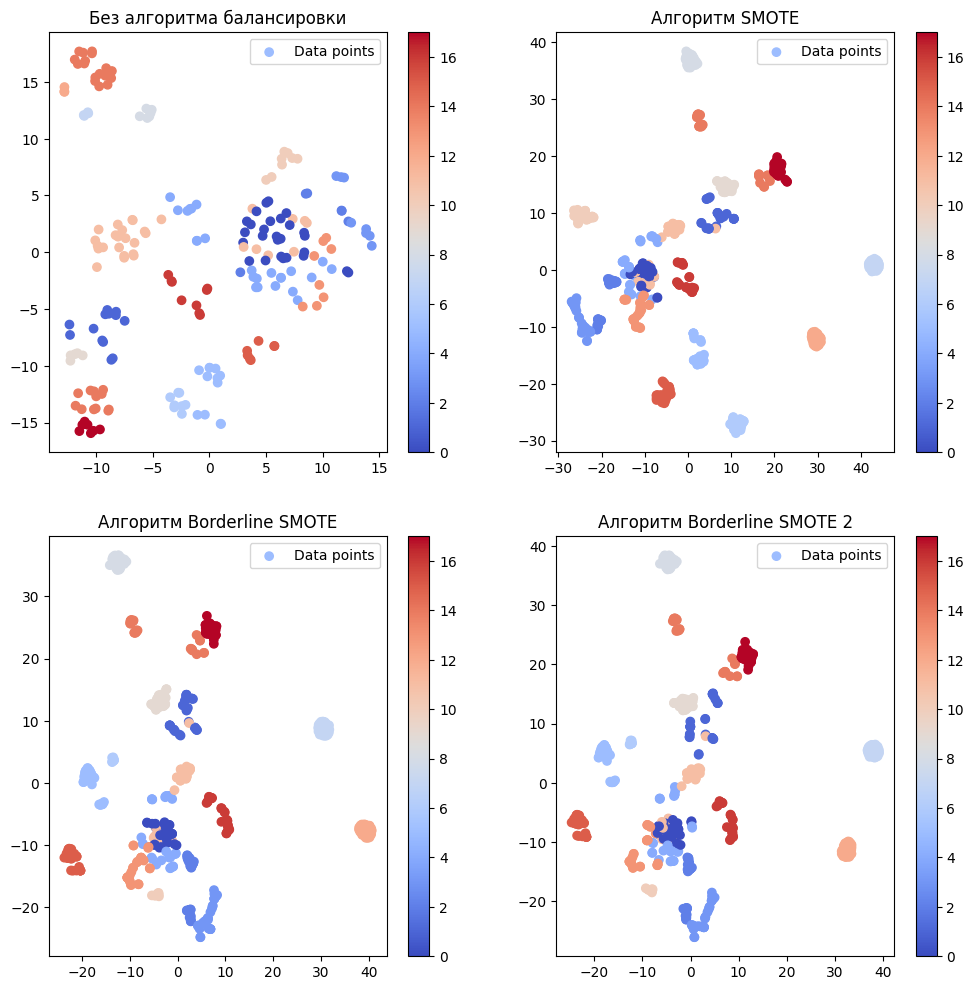

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, SMOTEN, BorderlineSMOTE
from umap import UMAP
import pacmap
import trimap
import warnings

warnings.filterwarnings("ignore")

# Загружаем данные
post_operative_patient = fetch_ucirepo(id=90)  # Используем UCI ML репозиторий
X = post_operative_patient.data.features
y = post_operative_patient.data.targets

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Оценка моделей
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1

# Обучение моделей до SMOTE
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

svm_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)

# Оценка классификаторов до SMOTE
print("До SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier, knn_classifier, rf_classifier]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")

# Применение SMOTE для балансировки классов
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote, y_train_smote)
knn_classifier_smote.fit(X_train_smote, y_train_smote)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Оценка классификаторов после SMOTE
print("После SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
    
# Применение Borderline SMOTE для балансировки классов
smote = BorderlineSMOTE(k_neighbors=2, random_state=42)
X_train_smote_b, y_train_smote_b = smote.fit_resample(X_train_scaled, y_train)

# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote_b, y_train_smote_b)
knn_classifier_smote.fit(X_train_smote_b, y_train_smote_b)
rf_classifier_smote.fit(X_train_smote_b, y_train_smote_b)

# Оценка классификаторов после SMOTE
print("После Borderline SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
# Применение Borderline SMOTE для балансировки классов
smote = BorderlineSMOTE(k_neighbors=2, random_state=42, kind='borderline-2')
X_train_smote_b2, y_train_smote_b2 = smote.fit_resample(X_train_scaled, y_train)

# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)
knn_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)
rf_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)

# Оценка классификаторов после SMOTE 2
print("После Borderline SMOTE 2:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Визуализация с t-SNE
tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

axs[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[0, 0].set_title('Без алгоритма балансировки')
axs[0, 0].legend()
axs[0, 0].colorbar = plt.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])

X_tsne = tsne.fit_transform(X_train_smote)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote)

axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[0, 1].set_title('Алгоритм SMOTE')
axs[0, 1].legend()
axs[0, 1].colorbar = plt.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])

X_tsne = tsne.fit_transform(X_train_smote_b)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_b)

axs[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[1, 0].set_title('Алгоритм Borderline SMOTE')
axs[1, 0].legend()
axs[1, 0].colorbar = plt.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])

X_tsne = tsne.fit_transform(X_train_smote_b2)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_b2)

axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[1, 1].set_title('Алгоритм Borderline SMOTE 2')
axs[1, 1].legend()
axs[1, 1].colorbar = plt.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])

class_counts = pd.Series(y).value_counts()
print(class_counts)

Распределение по классам:
Класс 2-4-d-injury: 1 экземпляров
Класс alternarialeaf-spot: 40 экземпляров
Класс anthracnose: 20 экземпляров
Класс bacterial-blight: 10 экземпляров
Класс bacterial-pustule: 10 экземпляров
Класс brown-spot: 40 экземпляров
Класс brown-stem-rot: 20 экземпляров
Класс charcoal-rot: 10 экземпляров
Класс cyst-nematode: 6 экземпляров
Класс diaporthe-pod-&-stem-blight: 6 экземпляров
Класс diaporthe-stem-canker: 10 экземпляров
Класс downy-mildew: 10 экземпляров
Класс frog-eye-leaf-spot: 40 экземпляров
Класс herbicide-injury: 4 экземпляров
Класс phyllosticta-leaf-spot: 10 экземпляров
Класс phytophthora-rot: 40 экземпляров
Класс powdery-mildew: 10 экземпляров
Класс purple-seed-stain: 10 экземпляров
Класс rhizoctonia-root-rot: 10 экземпляров
До SMOTE:
SVM -> Accuracy: 0.89, Recall: 0.85, Precision: 0.86, F1-Score: 0.85
KNN -> Accuracy: 0.87, Recall: 0.84, Precision: 0.82, F1-Score: 0.83
RF -> Accuracy: 0.87, Recall: 0.82, Precision: 0.81, F1-Score: 0.80
После SMOTE:
SVM -

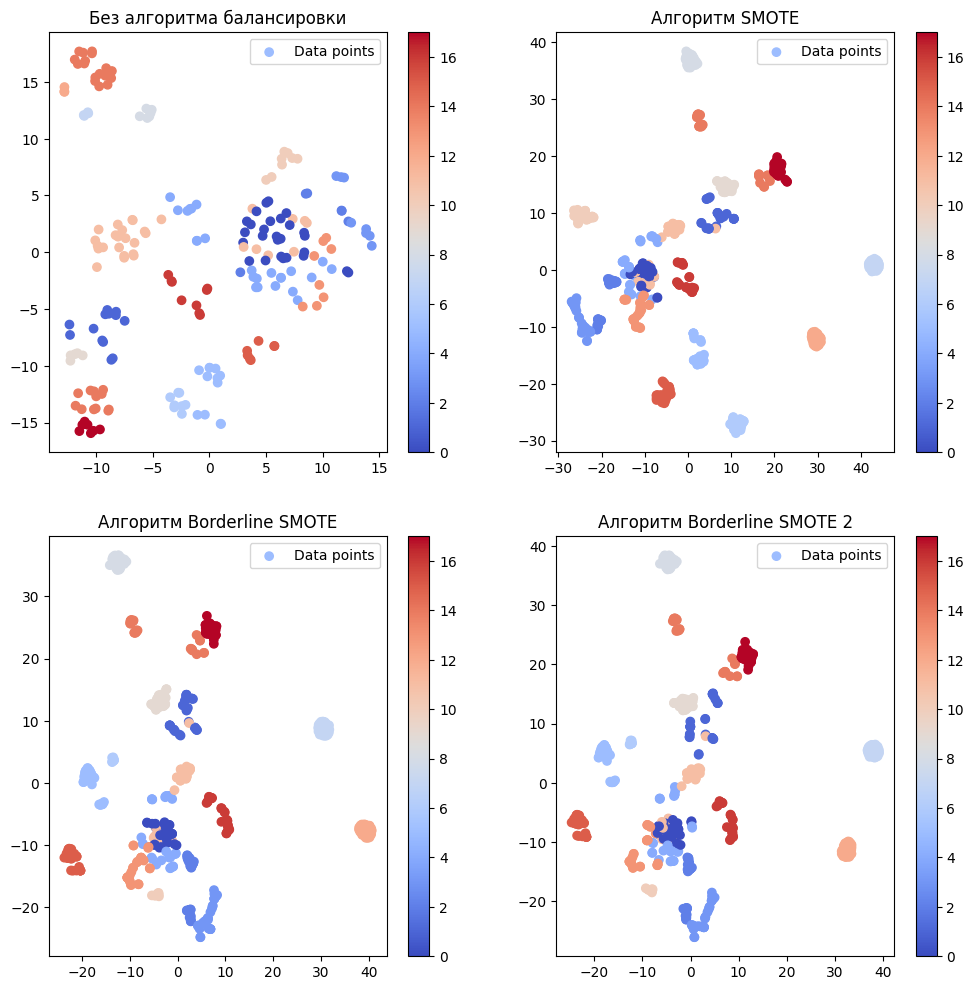

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, SMOTEN, BorderlineSMOTE
from umap import UMAP
import pacmap
import trimap
import warnings

warnings.filterwarnings("ignore")

# Загружаем данные
post_operative_patient = fetch_ucirepo(id=90)  # Используем UCI ML репозиторий
X = post_operative_patient.data.features
y = post_operative_patient.data.targets

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Распределение по классам:")
for class_label, count in class_distribution.items():
    print(f"Класс {class_label}: {count} экземпляров")
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Оценка моделей
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1

# Обучение моделей до SMOTE
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

svm_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
rf_classifier.fit(X_train_scaled, y_train)

# Оценка классификаторов до SMOTE
print("До SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier, knn_classifier, rf_classifier]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")

# Применение SMOTE для балансировки классов
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote, y_train_smote)
knn_classifier_smote.fit(X_train_smote, y_train_smote)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Оценка классификаторов после SMOTE
print("После SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
    
# Применение Borderline SMOTE для балансировки классов
smote = BorderlineSMOTE(k_neighbors=2, random_state=42)
X_train_smote_b, y_train_smote_b = smote.fit_resample(X_train_scaled, y_train)

# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote_b, y_train_smote_b)
knn_classifier_smote.fit(X_train_smote_b, y_train_smote_b)
rf_classifier_smote.fit(X_train_smote_b, y_train_smote_b)

# Оценка классификаторов после SMOTE
print("После Borderline SMOTE:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
# Применение Borderline SMOTE для балансировки классов
smote = BorderlineSMOTE(k_neighbors=2, random_state=42, kind='borderline-2')
X_train_smote_b2, y_train_smote_b2 = smote.fit_resample(X_train_scaled, y_train)

# Обучение моделей после SMOTE
svm_classifier_smote = SVC(random_state=42)
knn_classifier_smote = KNeighborsClassifier()
rf_classifier_smote = RandomForestClassifier(random_state=42)

svm_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)
knn_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)
rf_classifier_smote.fit(X_train_smote_b2, y_train_smote_b2)

# Оценка классификаторов после SMOTE 2
print("После Borderline SMOTE 2:")
for name, model in zip(['SVM', 'KNN', 'RF'], [svm_classifier_smote, knn_classifier_smote, rf_classifier_smote]):
    acc, rec, prec, f1 = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} -> Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1-Score: {f1:.2f}")
    
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Визуализация с t-SNE
tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

axs[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[0, 0].set_title('Без алгоритма балансировки')
axs[0, 0].legend()
axs[0, 0].colorbar = plt.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])

X_tsne = tsne.fit_transform(X_train_smote)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote)

axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[0, 1].set_title('Алгоритм SMOTE')
axs[0, 1].legend()
axs[0, 1].colorbar = plt.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])

X_tsne = tsne.fit_transform(X_train_smote_b)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_b)

axs[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[1, 0].set_title('Алгоритм Borderline SMOTE')
axs[1, 0].legend()
axs[1, 0].colorbar = plt.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])

X_tsne = tsne.fit_transform(X_train_smote_b2)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote_b2)

axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_encoded, cmap='coolwarm', label='Data points')
axs[1, 1].set_title('Алгоритм Borderline SMOTE 2')
axs[1, 1].legend()
axs[1, 1].colorbar = plt.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])

